In [1]:
# Install tensorflow_hub using pip install tensorflow_hub first

In [2]:
!pip install --upgrade tensorflow_hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [5]:
##  trained on 1000 classes of image size 224 *224
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

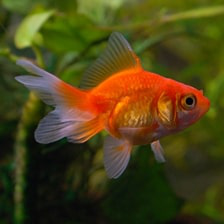

In [8]:
gold_fish = Image.open("goldfish.jpg").resize(IMAGE_SHAPE)
gold_fish

In [9]:
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [10]:
gold_fish[np.newaxis, ...]

array([[[[0.28627451, 0.32941176, 0.0627451 ],
         [0.31372549, 0.36470588, 0.09019608],
         [0.35294118, 0.41568627, 0.12941176],
         ...,
         [0.33333333, 0.38823529, 0.01568627],
         [0.33333333, 0.37647059, 0.00784314],
         [0.3254902 , 0.36862745, 0.00784314]],

        [[0.29411765, 0.3372549 , 0.07843137],
         [0.32156863, 0.37254902, 0.10196078],
         [0.35686275, 0.41960784, 0.14117647],
         ...,
         [0.32156863, 0.37647059, 0.00392157],
         [0.31764706, 0.37254902, 0.        ],
         [0.30980392, 0.36078431, 0.        ]],

        [[0.29019608, 0.32941176, 0.08235294],
         [0.31764706, 0.36470588, 0.10588235],
         [0.35294118, 0.41176471, 0.14117647],
         ...,
         [0.31372549, 0.36862745, 0.        ],
         [0.30980392, 0.36470588, 0.        ],
         [0.30588235, 0.35686275, 0.        ]],

        ...,

        [[0.04705882, 0.12156863, 0.01176471],
         [0.05098039, 0.1254902 , 0.01568627]

In [11]:
# because of 1000 classes..its shape is 1 to 1001
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

1/1 [==============================] - 8s 8s/step


(1, 1001)

In [13]:
result

array([[ 0.2201505,  2.8026974,  9.824761 , ..., -1.4572028, -0.051906 ,
        -0.643169 ]], dtype=float32)

In [12]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [14]:
# tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
image_labels = []
with open("ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

["{0: 'tench, Tinca tinca',",
 " 1: 'goldfish, Carassius auratus',",
 " 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',",
 " 3: 'tiger shark, Galeocerdo cuvieri',",
 " 4: 'hammerhead, hammerhead shark',"]

In [15]:
image_labels[predicted_label_index]

" 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',"

# Load flowers dataset

In [16]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 [==============================] - 1s 0us/step


In [17]:
data_dir

'./datasets/flower_photos'

In [18]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [19]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/roses/7376471712_e1be793f94.jpg'),
 PosixPath('datasets/flower_photos/roses/4279989256_9a48c0d194_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4231745228_ece86330d9.jpg'),
 PosixPath('datasets/flower_photos/roses/3873271620_1d9d314f01_n.jpg'),
 PosixPath('datasets/flower_photos/roses/7420699022_60fa574524_m.jpg')]

In [20]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [21]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/7376471712_e1be793f94.jpg'),
 PosixPath('datasets/flower_photos/roses/4279989256_9a48c0d194_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4231745228_ece86330d9.jpg'),
 PosixPath('datasets/flower_photos/roses/3873271620_1d9d314f01_n.jpg'),
 PosixPath('datasets/flower_photos/roses/7420699022_60fa574524_m.jpg')]

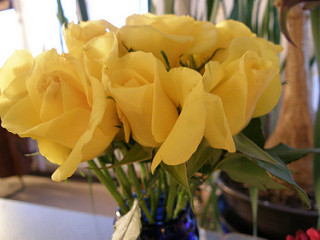

In [23]:
Image.open(str(roses[1]))

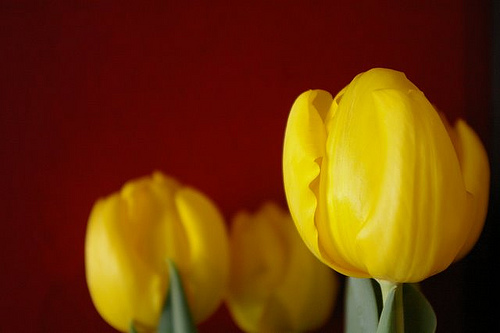

In [24]:
tulips = list(data_dir.glob('tulips/*'))
Image.open(str(tulips[0]))

# Read flowers images from data into numpy array using opencv

In [25]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [26]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [27]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/7376471712_e1be793f94.jpg'),
 PosixPath('datasets/flower_photos/roses/4279989256_9a48c0d194_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4231745228_ece86330d9.jpg'),
 PosixPath('datasets/flower_photos/roses/3873271620_1d9d314f01_n.jpg'),
 PosixPath('datasets/flower_photos/roses/7420699022_60fa574524_m.jpg')]

In [28]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/7376471712_e1be793f94.jpg'

In [29]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [30]:
img.shape

(333, 500, 3)

In [31]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [32]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [33]:
X = np.array(X)
y = np.array(y)

# Train test split

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [35]:
# Preprocessing: scale images
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

**Make prediction using pre-trained model on new flowers dataset**

In [36]:
X[0].shape

(224, 224, 3)

In [37]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [38]:
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)

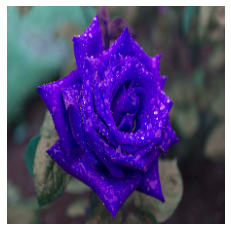

In [39]:
plt.axis('off')
plt.imshow(X[0])

In [40]:
predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

1/1 [==============================] - 1s 1s/step


array([795, 795, 795])

In [41]:
image_labels[795]

" 795: 'ski',"

# Now take pre-trained model and retrain it using flowers images

In [42]:
## this feature extractor command takes the feature of all the layer except the last layer
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)   # trainable is equal to false means all those layer will have fix weight

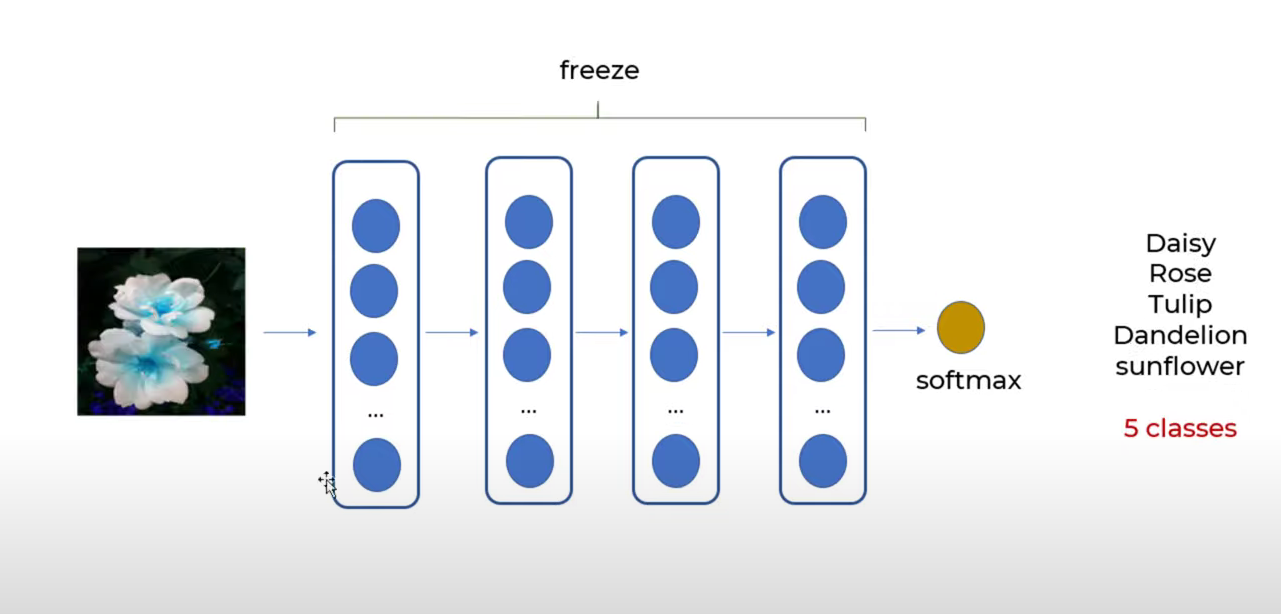

In [43]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [44]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 7s 41ms/step - loss: 0.7860 - acc: 0.7024
Epoch 2/5
86/86 [==============================] - 4s 41ms/step - loss: 0.4039 - acc: 0.8557
Epoch 3/5
86/86 [==============================] - 4s 41ms/step - loss: 0.3237 - acc: 0.8870
Epoch 4/5
86/86 [==============================] - 4s 42ms/step - loss: 0.2691 - acc: 0.9062
Epoch 5/5
86/86 [==============================] - 4s 43ms/step - loss: 0.2279 - acc: 0.9299


In [45]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 2s 54ms/step - loss: 0.3819 - acc: 0.8682


[0.3818681836128235, 0.8681917190551758]